<a href="https://colab.research.google.com/github/manikanta741/Data-Science/blob/main/duplicates%20inconsistent%20data%20%20outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#detecting duplicates


import pandas as pd
# Creating a sample dataset with duplicates
data = {'Name': ['Alice', 'Bob', 'Charlie', 'Alice'],
        'Age': [25, 30, 30, 25],
        'Salary': [50000, 60000, 60000, 50000]}

df = pd.DataFrame(data)

# Check for duplicates
print(df.duplicated())  # Returns True for duplicate rows
print(df.duplicated().sum())  # Counts duplicate rows


0    False
1    False
2    False
3     True
dtype: bool
1


In [2]:
#remove duplicates rows
df_no_duplicates = df.drop_duplicates()
print(df_no_duplicates)


      Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
2  Charlie   30   60000


In [4]:
#Removing Duplicates Based on Specific Columns
df.drop_duplicates(subset=['Age', 'Salary'], inplace=True)
print(df)

    Name  Age  Salary
0  Alice   25   50000
1    Bob   30   60000


In [ ]:
"""Check for duplicates using df.duplicated()
Remove duplicates using df.drop_duplicates()
Specify columns for duplicate checking using subset=['col1', 'col2']"""


In [5]:
# Identifying Inconsistencies
import pandas as pd

# Sample dataset with inconsistencies
data = {'Name': ['Alice', 'BOB', 'Charlie', 'alice '],  # Inconsistent capitalization & spaces
        'Age': [25, 'Thirty', 30, 22],  # Mixed data types
        'Salary': ['$50,000', '60000', '60,000', '45000']}  # Mixed formats

df = pd.DataFrame(data)
print(df)


      Name     Age   Salary
0    Alice      25  $50,000
1      BOB  Thirty    60000
2  Charlie      30   60,000
3   alice       22    45000


In [6]:
#Fixing Text Inconsistencies


#a)Standardizing Case (Lower/Upper)
df['Name'] = df['Name'].str.strip().str.title()  # Strips spaces & capitalizes first letters
print(df['Name'])


0      Alice
1        Bob
2    Charlie
3      Alice
Name: Name, dtype: object


In [10]:
# Fixing Data Type Issues
df['Age'] = pd.to_numeric(df['Age'])  # Converts 'Thirty' to NaN
print(df['Age'])


0    25.0
1     NaN
2    30.0
3    22.0
Name: Age, dtype: float64


In [11]:
# Handling Categorical Inconsistencies
#Standardizing Categories


df['Department'] = ['HR', 'hr', 'Finance', 'FINANCE']
df['Department'] = df['Department'].str.upper()
print(df['Department'])


0         HR
1         HR
2    FINANCE
3    FINANCE
Name: Department, dtype: object


In [12]:
"""1. Detecting Outliers
a) Using Summary Statistics (IQR Method)"""
import pandas as pd
import numpy as np

# Creating a sample dataset with outliers
data = {'Salary': [50000, 52000, 54000, 60000, 120000, 125000, 500000]}  # 500000 is an outlier

df = pd.DataFrame(data)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile range

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)]
print("Outliers detected:\n", outliers)


Outliers detected:
    Salary
6  500000


In [15]:
#b) Using Z-Score (Standard Deviation)
from scipy import stats

df['Z-Score'] = np.abs(stats.zscore(df['Salary']))
outliers = df[df['Z-Score'] > 3]  # Z-score threshold is usually 3
print("Outliers detected:\n", outliers)
"""output:
Outliers detected:
    Salary   Z-Score
6  500000  3.92
"""

Outliers detected:
 Empty DataFrame
Columns: [Salary, Z-Score]
Index: []


'op:\nOutliers detected:\n    Salary   Z-Score\n6  500000  3.92\n'

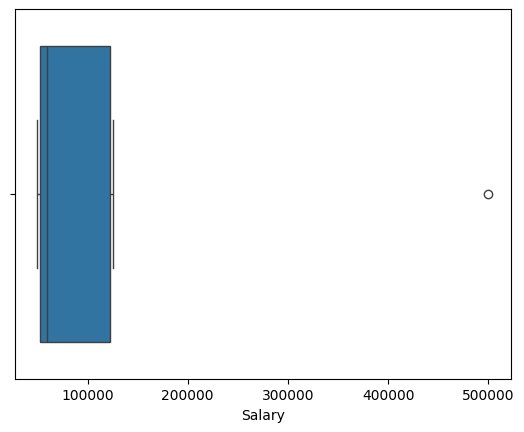

In [16]:
#c) Using Boxplot Visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['Salary'])
plt.show()


In [17]:
""""
2. Correcting Outliers
a) Removing Outliers"""
df_no_outliers = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]
print(df_no_outliers)


   Salary   Z-Score
0   50000  0.577678
1   52000  0.564441
2   54000  0.551205
3   60000  0.511495
4  120000  0.114401
5  125000  0.081310


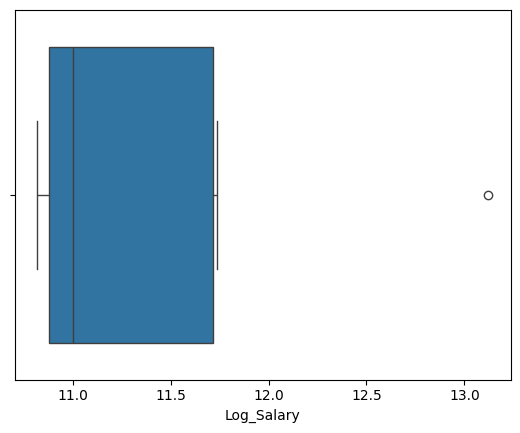

In [18]:
#b)Transforming Data (Log Transformation)
#For skewed data, applying a log transformation can reduce the impact of outliers.

df['Log_Salary'] = np.log(df['Salary'])
sns.boxplot(x=df['Log_Salary'])
plt.show()


In [ ]:
"""Detect outliers using IQR, Z-score, or Boxplots.
Correct outliers by removing, capping, or transforming data.
Choose a method based on context (errors vs. meaningful extremes)."""